<a href="https://colab.research.google.com/github/doartel/test/blob/master/RNN1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
# Install necessary libraries
!pip install pandas scikit-learn matplotlib tensorflow

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [7]:
# Load the financial time series dataset
df = pd.read_csv('FCHI.csv')  # Replace 'financial_time_series.csv' with your dataset file

In [9]:
# Preprocess the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df['Close'].values.reshape(-1, 1))

In [11]:
# Split the data into train and test sets
train_size = int(len(scaled_data) * 0.8)
test_size = len(scaled_data) - train_size
train_data, test_data = scaled_data[0:train_size, :], scaled_data[train_size:len(scaled_data), :]

In [24]:
from sklearn.preprocessing import MinMaxScaler

# Function to create sequences for training
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

# Define sequence length and create sequences
sequence_length = 10  # Adjust as needed
X_train, y_train = create_sequences(train_data, sequence_length)
X_test, y_test = create_sequences(test_data, sequence_length)

# Rescale the training data
X_train_scaled = scaler.fit_transform(X_train.reshape(-1, 1)).reshape(X_train.shape)
y_train_scaled = scaler.transform(y_train.reshape(-1, 1)).reshape(y_train.shape)

# Rescale the testing data
X_test_scaled = scaler.transform(X_test.reshape(-1, 1)).reshape(X_test.shape)
y_test_scaled = scaler.transform(y_test.reshape(-1, 1)).reshape(y_test.shape)

# Define the RNN model
model = Sequential([
    LSTM(units=50, return_sequences=True, input_shape=(X_train_scaled.shape[1], 1)),
    LSTM(units=50),
    Dense(units=1)
])

In [25]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [26]:
# Train the model
history = model.fit(X_train_scaled, y_train_scaled, epochs=100, batch_size=32, validation_split=0.1)

Epoch 1/100
6/6 [==============================] - 6s 230ms/step - loss: 0.2472 - val_loss: 0.2726
Epoch 2/100
6/6 [==============================] - 0s 25ms/step - loss: 0.0422 - val_loss: 0.0094
Epoch 3/100
6/6 [==============================] - 0s 24ms/step - loss: 0.0370 - val_loss: 0.0108
Epoch 4/100
6/6 [==============================] - 0s 28ms/step - loss: 0.0179 - val_loss: 0.0694
Epoch 5/100
6/6 [==============================] - 0s 23ms/step - loss: 0.0212 - val_loss: 0.0721
Epoch 6/100
6/6 [==============================] - 0s 22ms/step - loss: 0.0169 - val_loss: 0.0337
Epoch 7/100
6/6 [==============================] - 0s 21ms/step - loss: 0.0149 - val_loss: 0.0177
Epoch 8/100
6/6 [==============================] - 0s 26ms/step - loss: 0.0156 - val_loss: 0.0278
Epoch 9/100
6/6 [==============================] - 0s 25ms/step - loss: 0.0145 - val_loss: 0.0420
Epoch 10/100
6/6 [==============================] - 0s 25ms/step - loss: 0.0144 - val_loss: 0.0315
Epoch 11/100
6/6 [

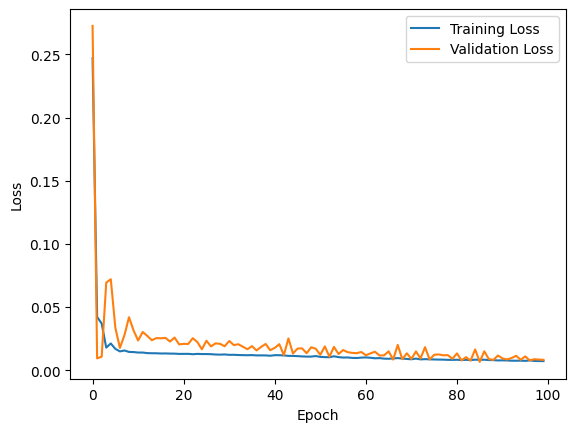

In [27]:
# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [28]:
# Evaluate the model on test data
test_loss = model.evaluate(X_test, y_test)
print("Test Loss:", test_loss)

2/2 [==============================] - 0s 14ms/step - loss: 0.0030
Test Loss: 0.002956867916509509


In [29]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Load the financial time series dataset
df = pd.read_csv('FCHI_2Y.csv')  # Replace 'financial_time_series.csv' with your dataset file

# Preprocess the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df['Close'].values.reshape(-1, 1))

Given a sequence (here the lastest sequence of the scaled_data from the CSV file), output the next closing price :

In [38]:
# Take the most recent sequence_length number of closing prices as input
input_sequence = scaled_data[-sequence_length:]

# Reshape the input sequence to match the model's input shape
input_sequence = input_sequence.reshape((1, sequence_length, 1))

# Rescale the input sequence
input_sequence_scaled = scaler.fit_transform(input_sequence.reshape(-1, 1)).reshape(input_sequence.shape)

# Make predictions
predicted_closing_price = model.predict(input_sequence_scaled)

# Inverse transform the predicted closing price to its original scale
predicted_closing_price = scaler.inverse_transform(predicted_closing_price)

print("Predicted Closing Price:", predicted_closing_price[0][0])

1/1 [==============================] - 0s 23ms/step
Predicted Closing Price: 0.9463383


In [35]:
from statsmodels.tsa.stattools import adfuller

# Convert the provided data into a one-dimensional array or list format
time_series_data = [
      7418.209961, 7406.009766, 7399.439941, 7446.890137, 7491.959961,
      # Add the rest of the data here...
]

# Perform the ADF test
result = adfuller(time_series_data)

# Extract the p-value from the ADF test result
p_value = result[1]

print("ADF Test p-value:", p_value)


array([[[0.89197064],
        [0.91130677],
        [0.92781567],
        [0.92747971],
        [0.93457743],
        [0.96044595],
        [0.9549417 ],
        [0.92520198],
        [0.95351042],
        [0.94437998]]])

Generate an array of sequence and the corresponding closing prices :

In [18]:
# Function to create sequences for prediction
def create_input_sequences(data, seq_length):
    sequences = []
    for i in range(len(data) - seq_length + 1):
        sequences.append(data[i:i+seq_length])
    return np.array(sequences)

# Load the trained model
# model = load_model('trained_model.h5')  # I use the pre trained model

# Define sequence length
sequence_length = 10  # Adjust as needed

# Create input sequences for prediction
input_sequences = create_input_sequences(scaled_data, sequence_length)

# Predict closing prices for all sequences
predicted_closing_prices = []
for sequence in input_sequences:
    # Reshape the sequence to match the model's input shape
    sequence = sequence.reshape(1, sequence_length, 1)
    # Predict closing price for the sequence
    predicted_price = model.predict(sequence)
    # Inverse transform the predicted closing price to its original scale
    predicted_price = scaler.inverse_transform(predicted_price)
    # Append the predicted closing price to the list
    predicted_closing_prices.append(predicted_price[0][0])

# Create a DataFrame to store the predicted closing prices along with their sequences
predicted_df = pd.DataFrame({'Last Sequence Price': df['Close'].values[sequence_length-1:], 'Predicted Closing Price': predicted_closing_prices})

# Save the DataFrame to a CSV file
predicted_df.to_csv('predicted_closing_prices.csv', index=False)
print("Predicted closing prices saved to 'predicted_closing_prices.csv'.")

1/1 [==============================] - 0s 27ms/step
Predicted closing prices saved to 'predicted_closing_prices.csv'.
